# "Medical Insurance Cost Prediction Using Machine Learning"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the sample database
df = pd.read_csv("/content/drive/MyDrive/ML_Project/insurance.csv")
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Cleaning data

### ENCODING CATEGORICAL FEATURES

Categorical Feautres :



1.   Sex
2.   Smoker
2.   Region




In [4]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the "category" column using the label encoder
df["sex"] = le.fit_transform(df["sex"])
category_map = {0: 1, 1: 0}
df["sex"] = df["sex"].map(category_map)

df["smoker"] = le.fit_transform(df["smoker"])
category_map = {0: 1, 1: 0}
df["smoker"] = df["smoker"].map(category_map)

# Create a sample dataframe
# 0=southeast
# 1=southwest
# 2=northeast
# 3=northwest

# # Create an ordinal encoder object
oe = OrdinalEncoder(categories=[['southeast', 'southwest', 'northeast','northwest']])

# # Fit and transform the "color" column using the ordinal encoder
df["region"] = oe.fit_transform(df[["region"]])

# # Set the value of the baseline category to 0
df.loc[df["region"] == "southeast", "region"] = 0

# Display the encoded dataframe
df['region'] = df['region'].astype(int)

# Display the encoded dataframe
print(df)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       0       1  16884.92
1      18    0  33.8         1       1       0   1725.55
2      28    0  33.0         3       1       0   4449.46
3      33    0  22.7         0       1       3  21984.47
4      32    0  28.9         0       1       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       1       3  10600.55
1334   18    1  31.9         0       1       2   2205.98
1335   18    1  36.9         0       1       0   1629.83
1336   21    1  25.8         0       1       1   2007.95
1337   61    1  29.1         0       0       3  29141.36

[1338 rows x 7 columns]


In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull()
# Count the number of missing values in each column of the DataFrame
num_missing = missing_values.sum()

# Display the number of missing values in each column
print(num_missing)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64



> No missing values




In [6]:
# Check for duplicates in the DataFrame
duplicates = df.duplicated()

# Count the number of duplicates in the DataFrame
num_duplicates = duplicates.sum()

# Display the number of duplicates in the DataFrame
print(num_duplicates)

1


In [7]:
# Find the duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated(keep=False)]

# Display the duplicate rows
print(duplicate_rows)

     age  sex   bmi  children  smoker  region  expenses
195   19    0  30.6         0       1       3   1639.56
581   19    0  30.6         0       1       3   1639.56




> Only 1 duplicate


In [8]:
# Drop duplicates from the DataFrame
df = df.drop_duplicates()

# Display the first few rows of the DataFrame after dropping duplicates
print(df)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       0       1  16884.92
1      18    0  33.8         1       1       0   1725.55
2      28    0  33.0         3       1       0   4449.46
3      33    0  22.7         0       1       3  21984.47
4      32    0  28.9         0       1       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       1       3  10600.55
1334   18    1  31.9         0       1       2   2205.98
1335   18    1  36.9         0       1       0   1629.83
1336   21    1  25.8         0       1       1   2007.95
1337   61    1  29.1         0       0       3  29141.36

[1337 rows x 7 columns]


## Distributions

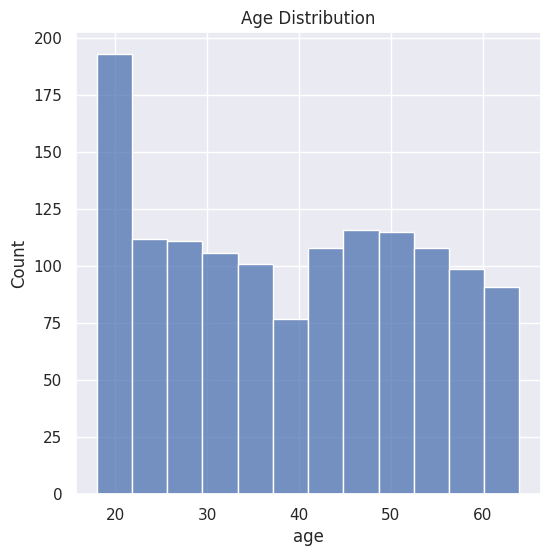

In [9]:
#Display and plot The features to view Age distribution 
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()



> The predominant age in this data set is between 18 and 20.




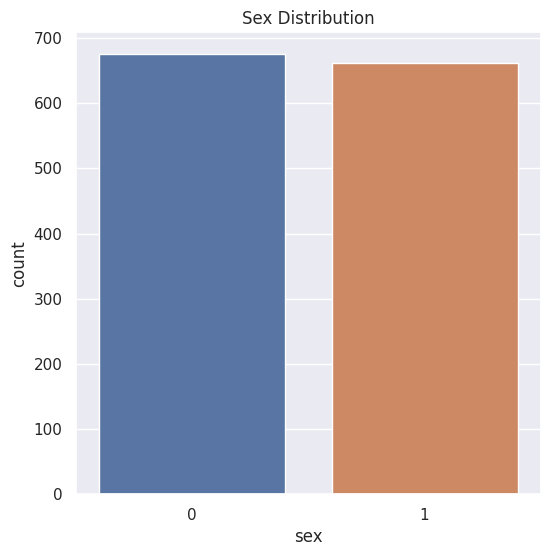

In [10]:
#Display and plot The features to view Sex distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

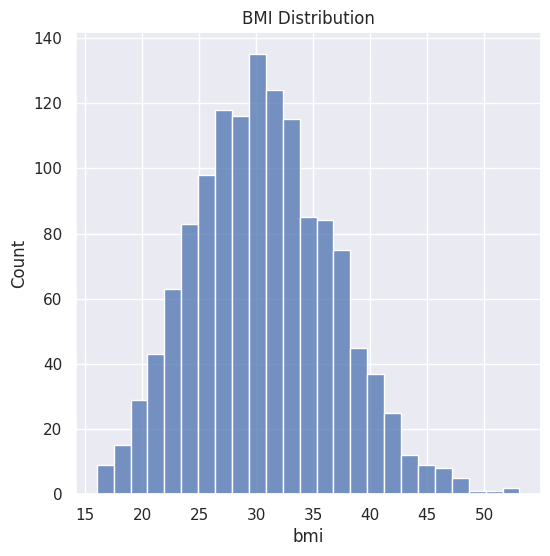

In [11]:
#Display and plot The features to view BMI distribution 
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

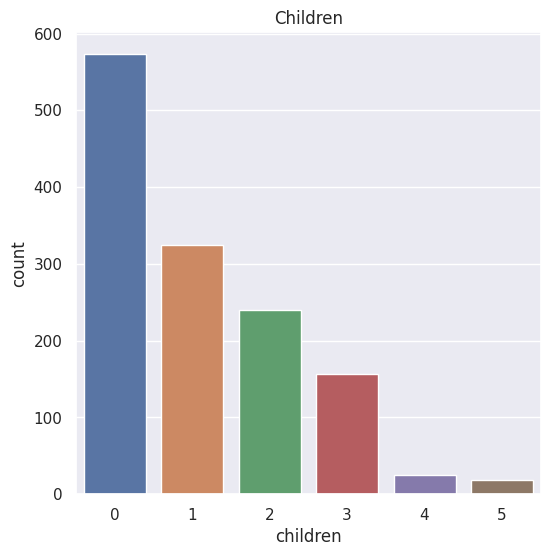

In [12]:
#Display and plot The features to view Children distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()



> Most people in this dataset have no children and the maximum number of children is 5





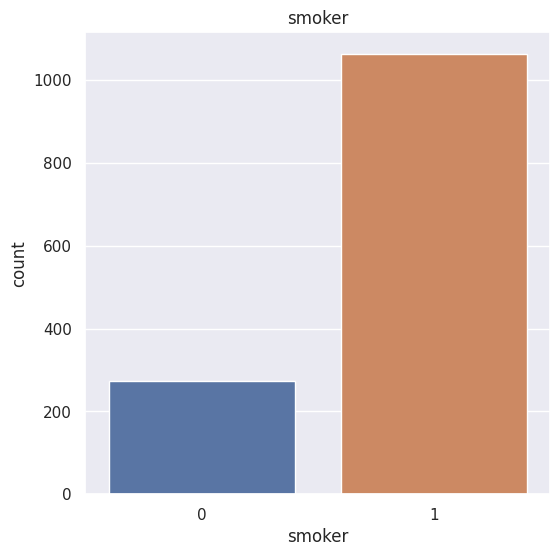

In [13]:
#Display and plot The features to view smoker distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

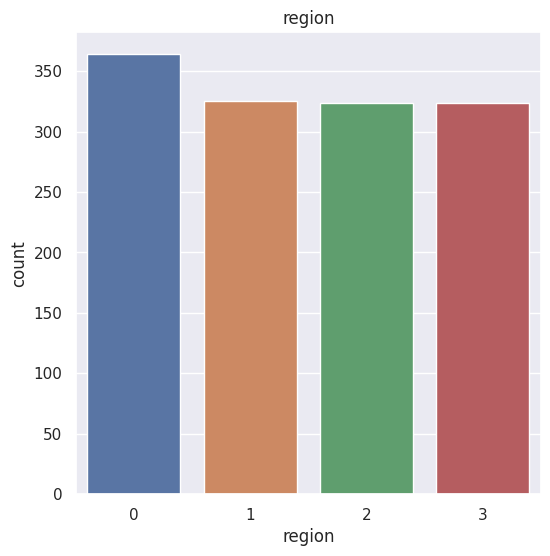

In [14]:
#Display and plot The features to view region distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()





> Most of the people in our dataset come from southeast region but it is very little differnce so it will be discarded



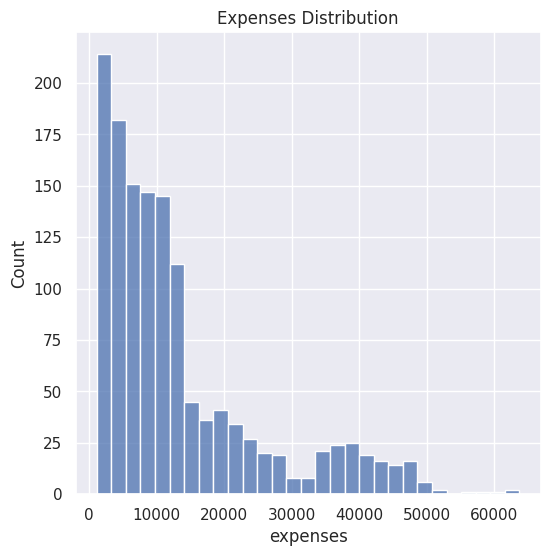

In [15]:
#Display and plot The features to view expenses distribution 
plt.figure(figsize=(6,6))
sns.histplot(df['expenses'])
plt.title('Expenses Distribution')
plt.show()

## Box Plots

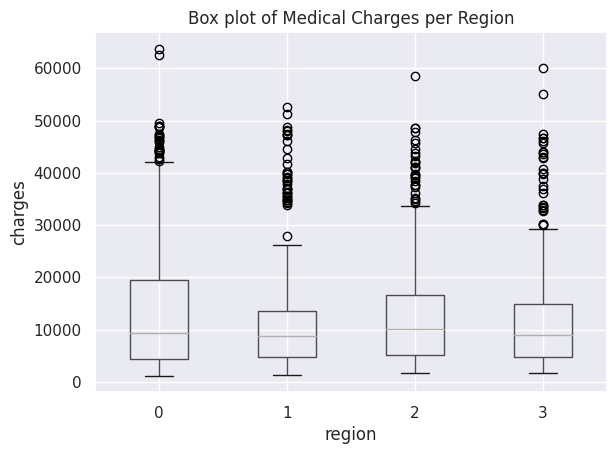

In [16]:
# Create a box plot for expenses grouped by region
df.boxplot(column=["expenses"], by="region")

# Set the title of the plot
plt.title('Box plot of Medical Charges per Region')

# Clear the overall title of the plot
#plt.title('')
plt.suptitle('')

# Set the y-axis label
plt.ylabel('charges')
plt.xlabel('region')

# Display the plot
plt.show()

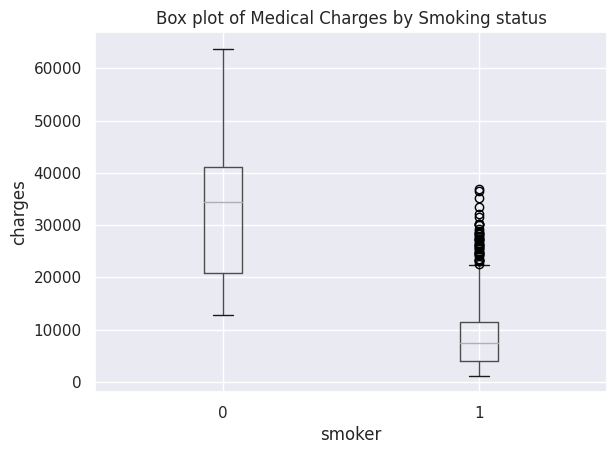

In [17]:
# Create a box plot for expenses grouped by smoker
df.boxplot(column=["expenses"], by="smoker")

# Set the title of the plot
plt.title('Box plot of Medical Charges by Smoking status')

# Clear the overall title of the plot
#plt.title('')
plt.suptitle('')

# Set the y-axis label
plt.ylabel('charges')
plt.xlabel('smoker')

# Display the plot
plt.show()

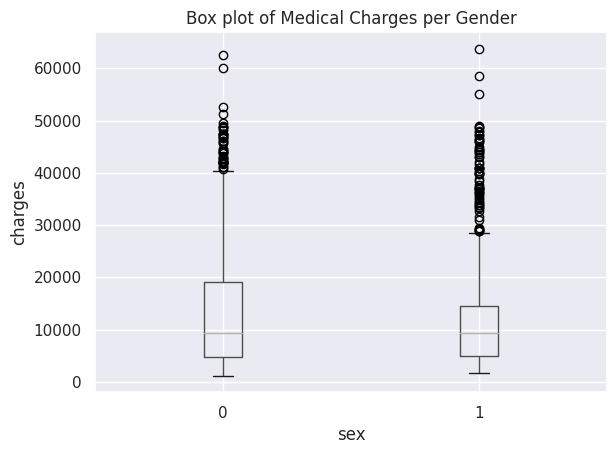

In [18]:
# Create a box plot for expenses grouped by region
df.boxplot(column=["expenses"], by="sex")

# Set the title of the plot
plt.title('Box plot of Medical Charges per Gender')

# Clear the overall title of the plot
#plt.title('')
plt.suptitle('')

# Set the y-axis label
plt.ylabel('charges')
plt.xlabel('sex')

# Display the plot
plt.show()

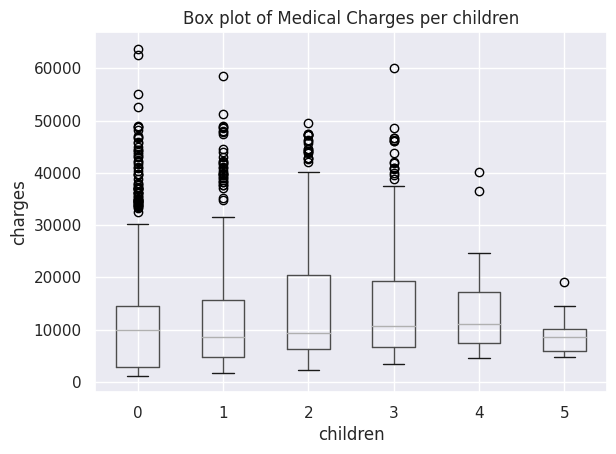

In [19]:
# Create a box plot for expenses grouped by region
df.boxplot(column=["expenses"], by="children")

# Set the title of the plot
plt.title('Box plot of Medical Charges per children')

# Clear the overall title of the plot
#plt.title('')
plt.suptitle('')

# Set the y-axis label
plt.ylabel('charges')
plt.xlabel('children')

# Display the plot
plt.show()

## Feature extraction

In [20]:
# Drop the 'region' column from the DataFrame
df.drop('region', axis=1, inplace=True)
print(df)

      age  sex   bmi  children  smoker  expenses
0      19    1  27.9         0       0  16884.92
1      18    0  33.8         1       1   1725.55
2      28    0  33.0         3       1   4449.46
3      33    0  22.7         0       1  21984.47
4      32    0  28.9         0       1   3866.86
...   ...  ...   ...       ...     ...       ...
1333   50    0  31.0         3       1  10600.55
1334   18    1  31.9         0       1   2205.98
1335   18    1  36.9         0       1   1629.83
1336   21    1  25.8         0       1   2007.95
1337   61    1  29.1         0       0  29141.36

[1337 rows x 6 columns]


In [21]:
#Define x and y; x represents all the column except region that was dropped earlier and the target feature,and y represents the target feature "Expenses" 
x = df.drop(columns='expenses', axis=1)
y = df['expenses']
print(df)

      age  sex   bmi  children  smoker  expenses
0      19    1  27.9         0       0  16884.92
1      18    0  33.8         1       1   1725.55
2      28    0  33.0         3       1   4449.46
3      33    0  22.7         0       1  21984.47
4      32    0  28.9         0       1   3866.86
...   ...  ...   ...       ...     ...       ...
1333   50    0  31.0         3       1  10600.55
1334   18    1  31.9         0       1   2205.98
1335   18    1  36.9         0       1   1629.83
1336   21    1  25.8         0       1   2007.95
1337   61    1  29.1         0       0  29141.36

[1337 rows x 6 columns]


In [22]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
normalize_scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = normalize_scaler.fit_transform(df[df.columns])
df_norm = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_data)

[[0.02173913 1.         0.32075472 0.         0.         0.25161073]
 [0.         0.         0.47978437 0.2        1.         0.00963598]
 [0.2173913  0.         0.45822102 0.6        1.         0.05311519]
 ...
 [0.         1.         0.56334232 0.         1.         0.00810809]
 [0.06521739 1.         0.26415094 0.         1.         0.01414366]
 [0.93478261 1.         0.35309973 0.         0.         0.44724875]]


In [23]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_data)

[[-1.44041773  1.00977099 -0.4534842  -0.90923416 -1.96966039  0.29785635]
 [-1.51164747 -0.99032355  0.51398555 -0.07944162  0.50770174 -0.9543808 ]
 [-0.79935006 -0.99032355  0.38280321  1.58014347  0.50770174 -0.72937268]
 ...
 [-1.51164747  1.00977099  1.02231711 -0.90923416  0.50770174 -0.96228774]
 [-1.29795825  1.00977099 -0.79783783 -0.90923416  0.50770174 -0.9310532 ]
 [ 1.55123139  1.00977099 -0.25671069 -0.90923416 -1.96966039  1.31029748]]


## Box plots after Normalization and Scale

In [24]:
# Create a boxplot of the scaled data frame
feature1 = df_scaled['age']
feature2 = df_scaled['bmi']
feature3 = df_scaled['children']
features_scaled = [feature1,feature2,feature3]

In [25]:
# Create a boxplot of the normalize data frame
feature1 = df_norm['age']
feature2 = df_norm['bmi']
feature3 = df_norm['children']
features_normalized = [feature1,feature2,feature3]

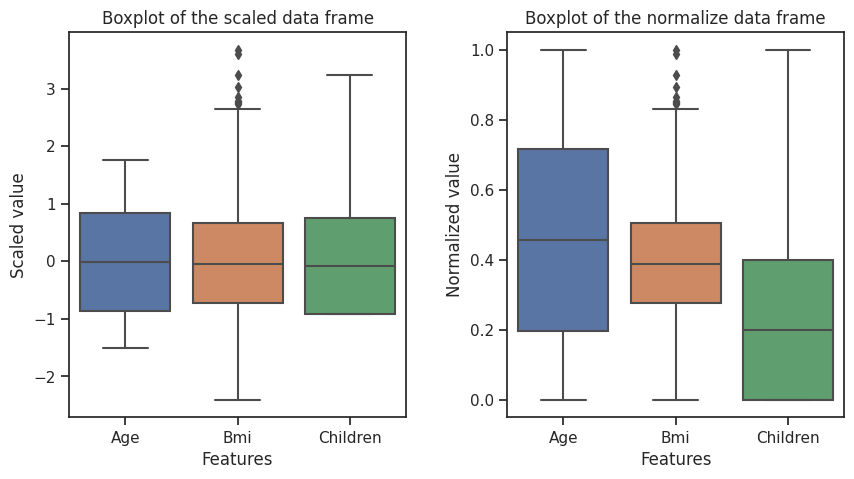

In [26]:
import seaborn as sns

# assuming 'data1' and 'data2' are your data
sns.set(style="ticks")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot the boxplot of the scaled data frame
sns.boxplot(data=features_scaled, ax=ax1)
ax1.set_xlabel('Features')
ax1.set_ylabel('Scaled value')
ax1.set_title('Boxplot of the scaled data frame')
#ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(['Age','Bmi','Children'])

# plot the boxplot of the scaled data frame
sns.boxplot(data=features_normalized, ax=ax2)
ax2.set_xlabel('Features')
ax2.set_ylabel('Normalized value')
ax2.set_title('Boxplot of the normalize data frame')
ax2.set_xticklabels(['Age','Bmi','Children'])

# adjust spacing between the plots
plt.subplots_adjust(wspace=0.3)

# show the plot
plt.show()


### sex and insurance expenses

Text(0.5, 1.0, 'Scatterplot of ho')

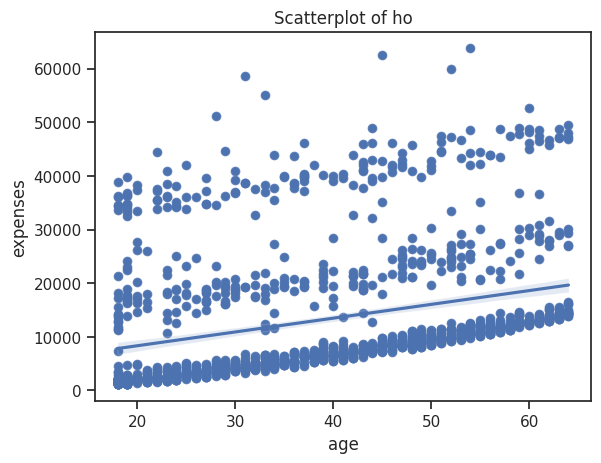

In [27]:
#Distribution of sex and their insurance expenses
sns.scatterplot(x=df['age'],y=df['expenses'])
sns.regplot(x=df['age'],y=df['expenses'])
plt.title('Scatterplot of ho')


> The regression line has apositive slope hence we could say that older people pay more insurance charges than younger people.



### BMI and insurance charges

<Axes: xlabel='bmi', ylabel='expenses'>

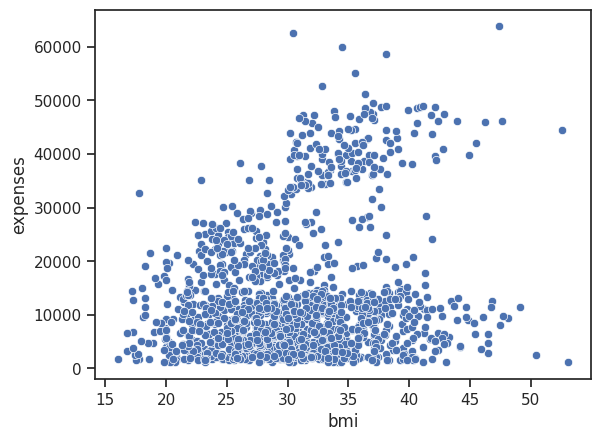

In [28]:
# BMI and insurance expenses
sns.scatterplot(x=df['bmi'], y=df['expenses'])



> We can see that people with high BMI pay more with regards to insurance charges. It may suggest that they are susceptible to diseases. We can going to add a regression line.





<Axes: xlabel='bmi', ylabel='expenses'>

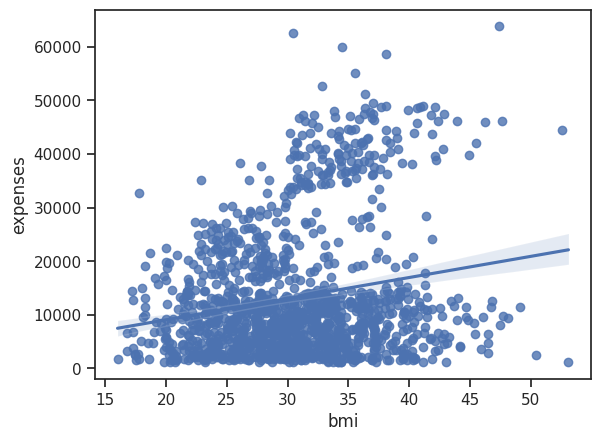

In [29]:
sns.regplot(x=df['bmi'],y=df['expenses'])



> The positive slope in our regression line confirms our assumptions on a positive correlation between BMI and insurance charges.





### How smoking affects BMI and Insurance Charges.


Text(0.5, 1.0, 'Scatterplot of how smoking affects BMI and Insurance Charges')

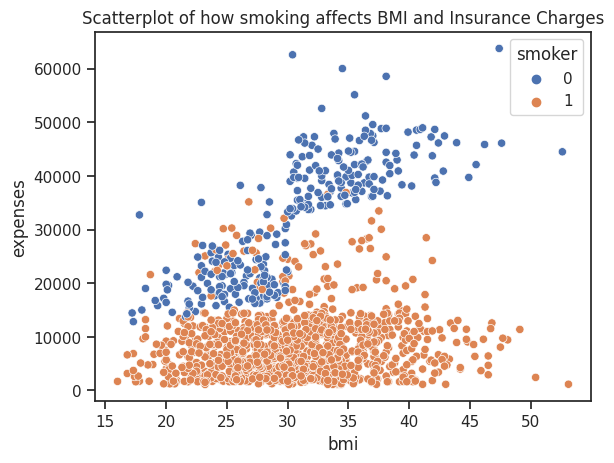

In [30]:
# How smoking affects BMI and Insurance Charges.
sns.scatterplot(x=df['bmi'],y=df['expenses'],hue=df['smoker'])
plt.title('Scatterplot of how smoking affects BMI and Insurance Charges')



> We can say that most people who smoke have a higher BMI than non-smokers and they also pay higher insurance charges than non-smokers.





In [31]:
# creating train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# creating a Linear regression model
model = LinearRegression()
# fitting the model
model.fit(x_train,y_train)
# making predictions
Linear_predictions = model.predict(x_test)
#Calculating R2 square
r2_test = metrics.r2_score(y_test,Linear_predictions)
print(f"R squared value: {r2_test*100}")

R squared value: 80.46052657607993


Text(0, 0.5, 'Predictions')

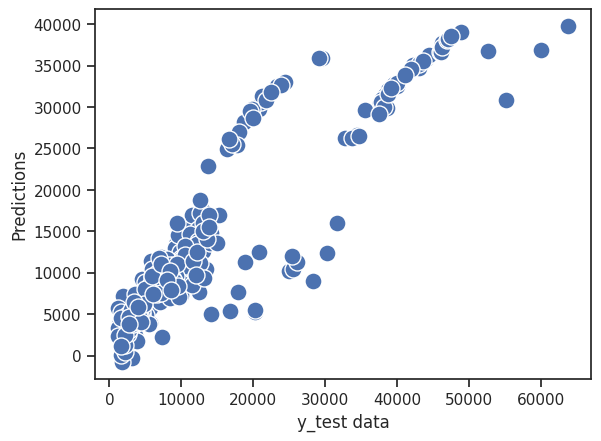

In [33]:
#Scatter plot between the test the predicted data 
sns.scatterplot(x=y_test,y= Linear_predictions, s=150)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [34]:
# create a decision tree regressor model
regressor = DecisionTreeRegressor() 
# fit the model
regressor.fit(x_train,y_train)
# making predictions
tree_predictions = regressor.predict(x_test)
#Calculating R2 square
r2_test = metrics.r2_score(y_test,tree_predictions)
print(f"R squared value: {r2_test*100}")

R squared value: 75.48093649201364


Text(0, 0.5, 'Predictions')

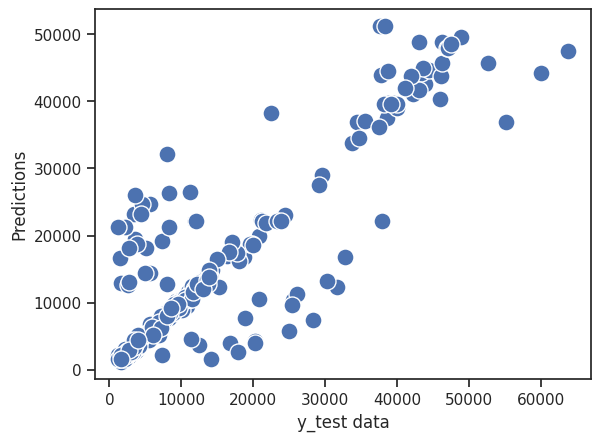

In [35]:
#Scatter plot between the test the predicted data 
sns.scatterplot(x=y_test, y=tree_predictions, s=150)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [36]:
# create a gradient boosting regressor model
reg = GradientBoostingRegressor() 
# fit the model
reg.fit(x_train,y_train)
# making predictions
predictions = reg.predict(x_test)
#Calculating R2 square
r2_test = metrics.r2_score(y_test,predictions)
print(f"R squared value: {r2_test*100}")

R squared value: 89.37164008342874


Text(0, 0.5, 'Predictions')

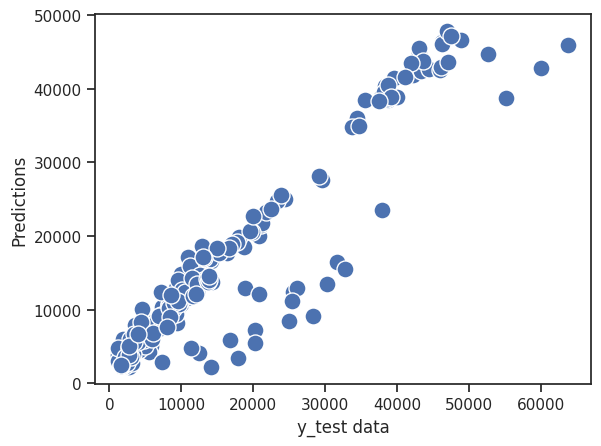

In [37]:
#Scatter plot between the test the predicted data 
sns.scatterplot(x=y_test,y= predictions, s=150)
plt.xlabel('y_test data')
plt.ylabel('Predictions')